<a href="https://colab.research.google.com/github/jssaini7815/100-days-of-code/blob/master/Fake_News_Classifier_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fake News Classifer
Dataset:https://www.kaggle.com/c/fake-news/data

Step 1:Get you Kaggle API Token
Go to Your Account and click on Create New API Token.
A file named kaggle.json will get downloaded containing your username and token key

Step 2: Uploading kaggle.json into Google Drive
Create a folder named Kaggle where we will be storing our Kaggle datasets
Upload your kaggle.json file into Kaggle folder


Step 3: Create a new Colab notebook

Step 4: Mount the drive to colab notebook
Use the below code to mount your google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Step 4: Run the following code to provide the config path to kaggle.json

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"
# /content/gdrive/MyDrive/kaggle /content/gdrive/MyDrive/kaggle/kaggle.json

Step 5: Change your present working directory


In [3]:
#changing the working directory
%cd /content/gdrive/MyDrive/kaggle/
#Check the present working directory using pwd command

/content/gdrive/MyDrive/kaggle


Step 6: Download the kaggle dataset
Go to kaggle and copy the API Command to download the dataset


Your API Command will look like “kaggle datasets download -d datasnaek/youtube-new”
Run the following code using ! :

In [4]:
!kaggle competitions download -c fake-news

submit.csv: Skipping, found more recently modified local copy (use --force to force download)
 53% 5.00M/9.42M [00:00<00:00, 24.3MB/s]
100% 9.42M/9.42M [00:00<00:00, 37.2MB/s]
 78% 29.0M/37.0M [00:00<00:00, 20.2MB/s]
100% 37.0M/37.0M [00:01<00:00, 38.1MB/s]


Step 7: Unzip your data and remove the zip file
Use the unzip and rm command

In [5]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

2 archives were successfully processed.


In [6]:
#Importing the libraries
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/kaggle/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [65]:
## Get the independent Features
X=df.drop('label',axis=1)

In [66]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [67]:
X.tail()

,id,title,author,text
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa..."


In [68]:
## Get the Dependent features
y=df['label']

In [69]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [70]:
df.shape

(18285, 5)

In [71]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer


In [72]:
X.shape

(18285, 4)

In [73]:
y.shape

(18285,)

In [74]:
### Vocabulary size
voc_size=5000

In [75]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import  pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

**OneHot Representation***

In [76]:
messages=X.copy()

In [77]:
messages.reset_index(inplace=True)

In [79]:
import nltk
import re
from nltk.corpus import stopwords

In [81]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
import tensorflow as tf

In [56]:
tf.__version__

'2.5.0'

In [82]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [19]:
import re
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [83]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
Corpus=[]
for i in range(0, len(messages)):
  review=re.sub('[^a-zA-Z]', ' ',messages['title'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  Corpus.append(review)


In [84]:
Corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [86]:
onehot_repr=[one_hot(words, voc_size)for words in Corpus]
onehot_repr

[[4019, 3883, 4625, 1954, 1716, 3530, 4145, 1439, 3745, 2817],
 [3094, 1948, 4267, 1156, 4878, 55, 819],
 [2703, 3165, 3564, 394],
 [4874, 1963, 443, 178, 2760, 3118],
 [4537, 4878, 137, 3200, 3074, 3139, 4878, 4244, 1104, 326],
 [4610,
  3361,
  698,
  3082,
  3955,
  4785,
  20,
  896,
  1800,
  1833,
  628,
  3423,
  4266,
  3903,
  819],
 [2101, 1293, 1611, 1923, 2868, 4111, 3285, 1262, 1132, 1591, 3604],
 [47, 1600, 1493, 2475, 4209, 2567, 4785, 2624, 1132, 1591, 3604],
 [2626, 4511, 456, 404, 152, 1412, 108, 763, 4785, 3985],
 [3155, 1719, 2571, 288, 38, 4112, 850, 271],
 [263, 4896, 974, 2700, 3521, 1099, 777, 1599, 4986, 2537, 4514],
 [178, 45, 1716, 1412, 4785, 4209],
 [1205, 2220, 183, 1390, 697, 4599, 4276, 2029, 3672],
 [3241, 1072, 2603, 3714, 1724, 1610, 1287, 1132, 1591, 3604],
 [700, 2197, 1837, 4805, 4538, 1132, 1591, 3604],
 [3816, 2731, 1807, 1135, 2893, 2659, 2276, 429, 962, 4178],
 [2619, 4047, 1948],
 [729, 4856, 504, 226, 4785, 4523, 426, 819],
 [3068, 3524, 4267

In [ ]:
### Embedding Representation ***************

In [87]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1439 3745 2817]
 [   0    0    0 ... 4878   55  819]
 [   0    0    0 ... 3165 3564  394]
 ...
 [   0    0    0 ... 1132 1591 3604]
 [   0    0    0 ... 3442 3920 1327]
 [   0    0    0 ...  854  489  692]]


In [88]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4019,
       3883, 4625, 1954, 1716, 3530, 4145, 1439, 3745, 2817], dtype=int32)

In [89]:
#### Creating Model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


**Adding Dropout***

In [ ]:
#####Adding Dropout
#### 
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0,3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

In [90]:
len(embedded_docs),y.shape

(18285, (18285,))

In [91]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [92]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.33,random_state=42)

**Model Training****

In [95]:
#Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.5983 - val_accuracy: 0.9162
Epoch 2/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0064 - accuracy: 0.9983 - val_loss: 0.4940 - val_accuracy: 0.9105
Epoch 3/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.6225 - val_accuracy: 0.9163
Epoch 4/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.4777 - val_accuracy: 0.9132
Epoch 5/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.6391 - val_accuracy: 0.9115
Epoch 6/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.6219 - val_accuracy: 0.9148
Epoch 7/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.7331 - val_accuracy: 0.9147

In [ ]:
### Adding Dropout

In [96]:
y_pred=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(y_test,y_pred)

array([[3121,  298],
       [ 226, 2390]])

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9131731565865783

In [22]:
### Applying CountVectorizer
### Creating the Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(Corpus).toarray()
# tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
# X=tfidf_v.fit_transform(Corpus).toarray()


In [23]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
X.shape

(18285, 5000)

In [25]:
y=messages['label']

In [26]:
### Divide the datasert into Train and Test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)


In [27]:
#tfidf_v.get_feature_names()[:20]

In [28]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [29]:
# tfidf_v.get_params()

In [30]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [31]:
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names())

In [32]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,...,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,year sinc,yemen,yet,yet anoth,yiannopoulo,yield,yo,york,york citi,york new,york new york,york state,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
import matplotlib.pyplot as plt
 

In [34]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
  """
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [35]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [36]:
from sklearn import metrics
import numpy as np
import itertools

accuracy: 0.902
Confusion matrix, without normalization


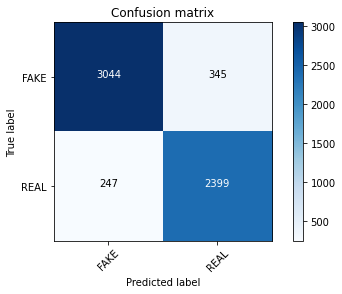

In [37]:
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
score=metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f" % score)
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])


In [38]:
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
score=metrics.accuracy_score(y_test,pred)
score

0.9019055509527755

In [39]:
y_train.shape


(12250,)

Passive Aggressive Classifier Algorithm

In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy: 0.919
Confusion matrix, without normalization


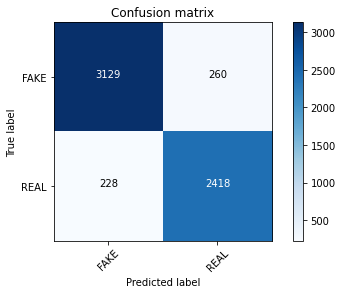

In [41]:
linear_clf.fit(X_train,y_train)
pred=linear_clf.predict(X_test)
score=metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f" % score)
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

Multinomial Classifier with Hyperparameter

In [42]:
classifier=MultinomialNB(alpha=0.1)

In [43]:
previous_score=0
for alpha in np.arange(0,1,0.1):
  sub_classifier=MultinomialNB(alpha=alpha)
  sub_classifier.fit(X_train,y_train)
  y_pred=sub_classifier.predict(X_test)
  score=metrics.accuracy_score(y_test,y_pred)
  if score > previous_score:
    classifier=sub_classifier
  print("Alpha: {}, Score:{}".format(alpha,score))
  

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score:0.8903065451532726
Alpha: 0.1, Score:0.9020712510356255
Alpha: 0.2, Score:0.9025683512841757
Alpha: 0.30000000000000004, Score:0.9024026512013256
Alpha: 0.4, Score:0.9017398508699255
Alpha: 0.5, Score:0.9015741507870754
Alpha: 0.6000000000000001, Score:0.9022369511184756
Alpha: 0.7000000000000001, Score:0.9025683512841757
Alpha: 0.8, Score:0.9015741507870754
Alpha: 0.9, Score:0.9017398508699255


In [44]:
#Get features names
feature_names=cv.get_feature_names()

In [45]:
classifier.coef_[0]

array([ -9.10038883,  -8.62276128,  -9.10038883, ..., -10.79498456,
        -8.91467169,  -9.32864749])

In [46]:
##### Most real
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[:20]

[(-4.000149156604985, 'trump'),
 (-4.287872694443541, 'hillari'),
 (-4.396389621061519, 'clinton'),
 (-4.899969726208735, 'elect'),
 (-5.176598600897756, 'new'),
 (-5.234730366348767, 'comment'),
 (-5.273968180973631, 'video'),
 (-5.3868167681180115, 'war'),
 (-5.396821854078974, 'us'),
 (-5.412019714988405, 'hillari clinton'),
 (-5.417137433425386, 'fbi'),
 (-5.48068448454208, 'vote'),
 (-5.566255475855405, 'email'),
 (-5.578238842742501, 'world'),
 (-5.634015380199913, 'obama'),
 (-5.734501455772904, 'donald'),
 (-5.763095255139644, 'donald trump'),
 (-5.785090276725191, 'russia'),
 (-5.846224665218559, 'day'),
 (-5.862110622807369, 'america')]

In [47]:
#Most fake
sorted(zip(classifier.coef_[0],feature_names))[:20]

[(-10.794984555596727, 'abe'),
 (-10.794984555596727, 'abroad'),
 (-10.794984555596727, 'abus new'),
 (-10.794984555596727, 'abus new york'),
 (-10.794984555596727, 'act new'),
 (-10.794984555596727, 'act new york'),
 (-10.794984555596727, 'advic'),
 (-10.794984555596727, 'advis new'),
 (-10.794984555596727, 'advis new york'),
 (-10.794984555596727, 'age new'),
 (-10.794984555596727, 'age new york'),
 (-10.794984555596727, 'agenda breitbart'),
 (-10.794984555596727, 'ail'),
 (-10.794984555596727, 'aleppo new'),
 (-10.794984555596727, 'aleppo new york'),
 (-10.794984555596727, 'ali'),
 (-10.794984555596727, 'america breitbart'),
 (-10.794984555596727, 'america new york'),
 (-10.794984555596727, 'american breitbart'),
 (-10.794984555596727, 'american new')]